# Focusing on only part of the curve

For SWE computation purposes, we only look at the part of the lidar curve after December 27th, to avoid being put off by the complex beginning.

In [1]:
def compute_swe(depth_array, ro_array):
    '''
    TODO
    Args:
        depth_array: list or array containing the depth of each snow layer (in m)
        ro_array: list or array containing the density of each snow layer (in kg.m⁻3)
    Returns:
        swe_value: computed swe for the snowpack
    '''
    depth_array = np.array(depth_array)
    ro_array = np.array(ro_array)
    swe_value = np.dot(depth_array, ro_array) / 1000
    return(swe_value)

In [2]:
%run little_awk_functions.py

In [3]:
# data_dec_jan_fev = xr.open_mfdataset('/home/mabonnet/Desktop/data/Data_netcdf/data-filled/*.nc', chunks={'x': 20,'y': 20, 'time': 10})
# data_dec_jan_fev.isel(x=slice(84,106), y=slice(28,50), time=slice(2100,7776)).to_netcdf('snow_pit_1_filled_partial.nc')
data_pit_1 = xr.open_dataset('snow_pit_1_filled_partial.nc')

# data_dec_jan_fev = xr.open_mfdataset('/home/mabonnet/Desktop/data/Data_netcdf/data-filled/*.nc', chunks={'x': 20,'y': 20, 'time': 10})
# data_dec_jan_fev.isel(x=slice(105,127), y=slice(39,61), time=slice(2100,7776)).to_netcdf('snow_pit_2_filled_partial.nc')
data_pit_2 = xr.open_dataset('snow_pit_2_filled_partial.nc')

In [74]:
# data_dec_jan_fev = xr.open_mfdataset('/home/mabonnet/Desktop/data/Data_netcdf/data-filled/*.nc', chunks={'x': 20,'y': 20, 'time': 10})
# data_dec_jan_fev.isel(x=slice(84,106), y=slice(28,50), time=slice(4000,7776)).to_netcdf('snow_pit_1_filled_partial_post_ice.nc')
data_pit_1_post_ice = xr.open_dataset('snow_pit_1_filled_partial_post_ice.nc')

# data_dec_jan_fev = xr.open_mfdataset('/home/mabonnet/Desktop/data/Data_netcdf/data-filled/*.nc', chunks={'x': 20,'y': 20, 'time': 10})
# data_dec_jan_fev.isel(x=slice(105,127), y=slice(39,61), time=slice(4000,7776)).to_netcdf('snow_pit_2_filled_partial_post_ice.nc')
data_pit_2_post_ice = xr.open_dataset('snow_pit_2_filled_partial_post_ice.nc')

In [22]:
data_pit_1 = data_pit_1.ffill(dim='time')
median_space_filtering(data_pit_1, 5, x_span=7)
data_pit_1['snow_surface'] = data_pit_1['snow_surface'] - data_pit_1['snow_surface'].min() - 0.48775931

data_pit_2 = data_pit_2.ffill(dim='time')
median_space_filtering(data_pit_2, 5, x_span=7)
data_pit_2['snow_surface'] = data_pit_2['snow_surface'] - data_pit_2['snow_surface'].min() - 0.20348107

x_sel1 = 10
y_sel1 = 10

x_sel2 = 10
y_sel2 = 10

---> Median filtering in space with a window [7, 11]
---> Median filtering in space with a window [7, 11]


In [75]:
data_pit_1_post_ice = data_pit_1_post_ice.ffill(dim='time')
median_space_filtering(data_pit_1_post_ice, 5, x_span=7)
data_pit_1_post_ice['snow_surface'] = data_pit_1_post_ice['snow_surface'] - data_pit_1_post_ice['snow_surface'].min() #- 0.48775931

data_pit_2_post_ice = data_pit_2_post_ice.ffill(dim='time')
median_space_filtering(data_pit_2_post_ice, 5, x_span=7)
data_pit_2_post_ice['snow_surface'] = data_pit_2_post_ice['snow_surface'] - data_pit_2_post_ice['snow_surface'].min() #- 0.20348107

---> Median filtering in space with a window [7, 11]
---> Median filtering in space with a window [7, 11]


In [5]:
x_sel = 10
y_sel = 10

use_true_temp = True   # set to True if want to use the correct temperature forcing

In [20]:
# Meteorological forcing

if use_true_temp:
    met_time, met_temp = get_met_forcing()
else:
    met_time, met_temp = [0], [tsfc]

In [130]:
# Define parameters

time_window_std = 25
std_threshold = 0.012   # TODO real value

# Adaptable parameters
tsfc = -5
cp_snow = 2106
dt = 100
a1 = 0.0013
a2 = 0.021

max_nb_of_layers = 25

use_true_temp = True   # set to True if want to use the correct temperature forcing

simul_new_snow_ro = 280      # TODO real value
simul_fit_top_of_snowfall_to_curve = False

# 'Fixed' parameters
tf = 0
ro_water = 1000
ro_ice = 910
jj = 0


In [118]:
data_starting_date_in_ns = float(data_pit_1.time.values[0])

data_starting_date_in_s = pd.to_datetime(data_pit_1.time.values[0]).timestamp()
data_ending_date_in_s = pd.to_datetime(data_pit_1.time.values[-1]).timestamp()
data_duration_in_s = data_ending_date_in_s - data_starting_date_in_s
nb_iterations = int(data_duration_in_s/dt + 1)

data_start_date = pd.to_datetime('2021-12-27T21:00')       # TODO real value

In [119]:
# Defining parameters for snowdepth figure

data_start_date = pd.to_datetime('2021-12-27T21:00')          # TODO real value
nb_layers_to_plot = 17
figure_size = (28, 19)
save_file_to_png = False
file_name = 'bazar.png'
title = 'Comparison between lidar-measured and simulated snow depth'

# TODO add param dpi pour qualite image ?

# Define data set used

In [120]:
data_set_used = data_pit_2_post_ice

In [121]:
# Define structures to store snow parameters

ro_layer = np.zeros((max_nb_of_layers, 1))
t_old = np.zeros((max_nb_of_layers, 1))
dy_snow = np.zeros((max_nb_of_layers, 1))
gamma = np.zeros((max_nb_of_layers, 1))
melt_flag = np.zeros((max_nb_of_layers, 1))

In [122]:

results = get_snow_events(data_set_used, x_sel, y_sel, time_window_std, std_threshold)
start_accumulation = results[0]
start_erosion = results[1]
end_accumulation = results[2]
end_erosion = results[3]

# print(start_accumulation, start_erosion, end_accumulation, end_erosion)

In [123]:
# Convert end times into more manageable orders of magnitude

end_accumulation_times = data_set_used.snow_surface.isel(x=x_sel, y=y_sel, time=end_accumulation)
end_accumulation_times = (pd.to_datetime(end_accumulation_times.time).astype(int) - data_starting_date_in_ns) / 1000000000  # in s

end_erosion_times = data_set_used.snow_surface.isel(x=x_sel, y=y_sel, time=end_erosion)
end_erosion_times = (pd.to_datetime(end_erosion_times.time).astype(int) - data_starting_date_in_ns) / 1000000000  # in s


In [131]:
# Update variables at each timepoint

snowpack = simulate_snowpack_evolution(data_set_used, x_sel, y_sel, nb_iterations, end_accumulation_times, end_erosion_times,
                                       start_accumulation, end_accumulation, start_erosion, end_erosion, jj, dt, ro_layer, ro_water, ro_ice,
                                       t_old, tf, tsfc, dy_snow, gamma, cp_snow, melt_flag, a1, a2, met_temp_data=met_temp,
                                       met_time_data=met_time, new_snow_ro=simul_new_snow_ro, fit_top_of_snowfall_to_curve=simul_fit_top_of_snowfall_to_curve)

ro_layer_evolution, depth_evolution, temperature_evolution = snowpack[0], snowpack[1], snowpack[2]

In [132]:
compute_swe(depth_evolution[-1], ro_layer_evolution[-1])

0.09474849700927734

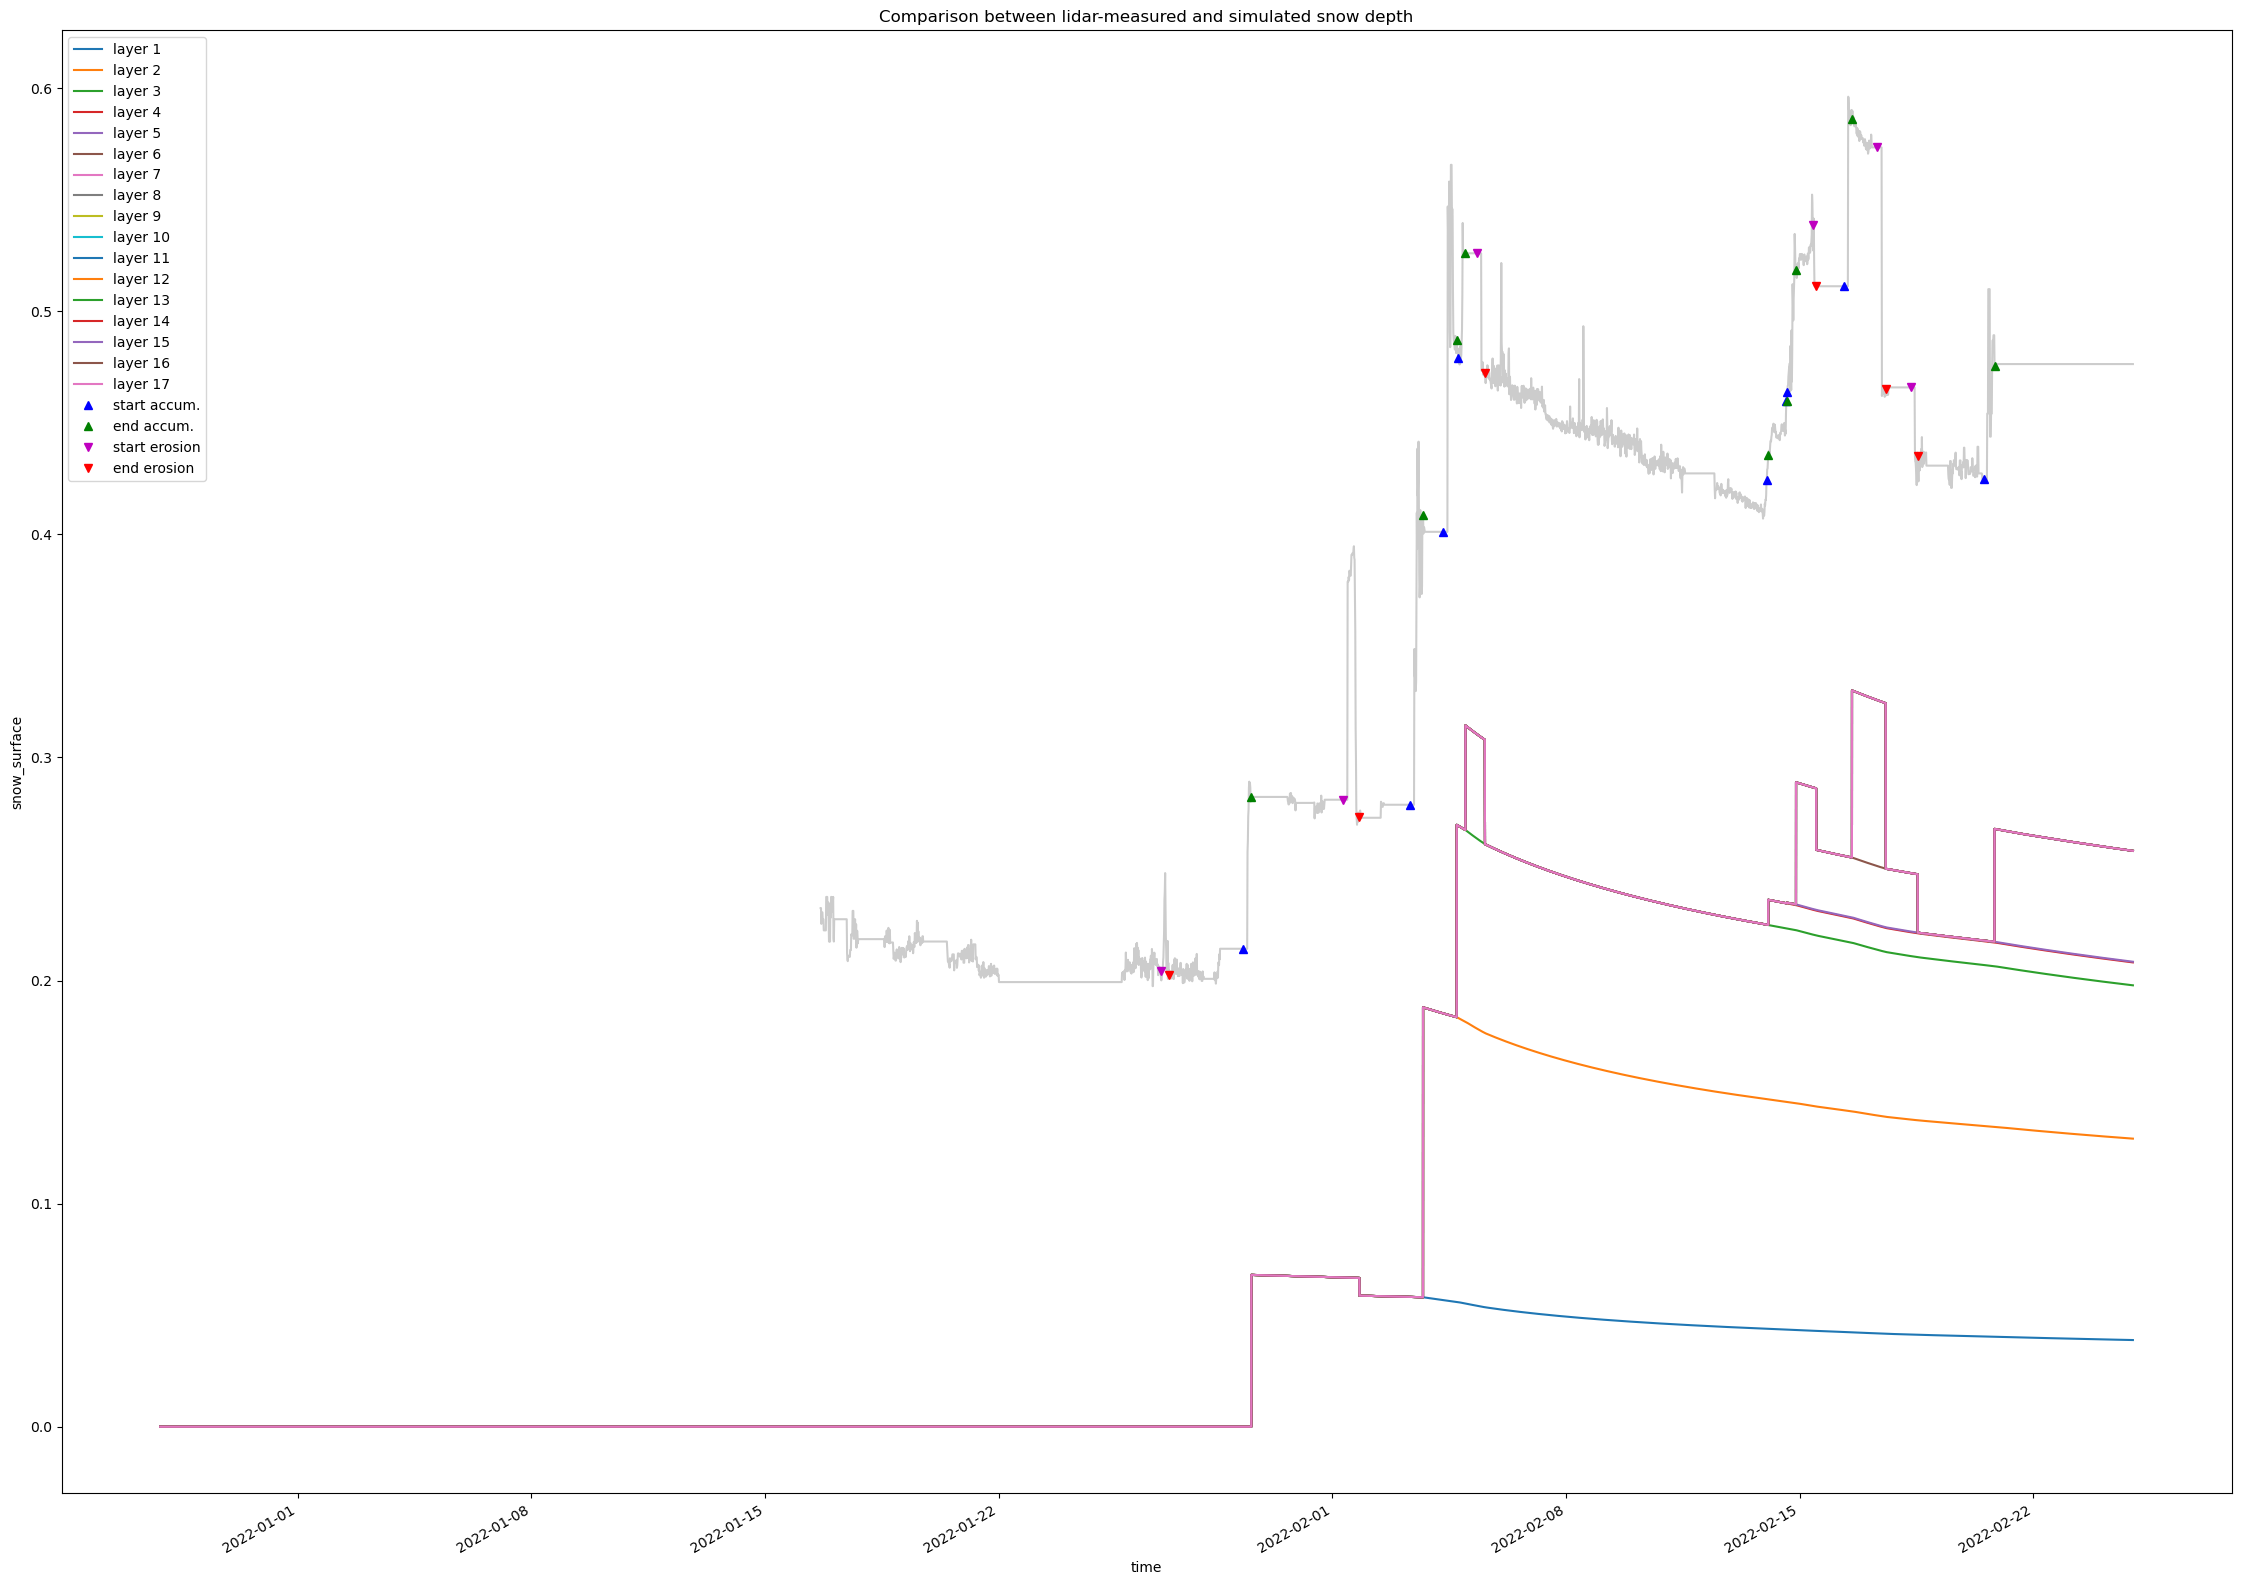

()

In [126]:
plot_simul_and_signal(data_set_used, x_sel, y_sel, depth_evolution, nb_layers_to_plot, data_start_date, dt, nb_iterations,
                      start_accumulation, end_accumulation, start_erosion, end_erosion, my_figsize=figure_size,
                      save_file=save_file_to_png, my_file_name=file_name, my_title=title)

# TODO add parameters as subtitle automatically

In [86]:
total_accumulated_snow_pit = 0
total_eroded_snow_pit = 0

for index in range(len(start_accumulation)):
    ddepth_event = get_change_in_snow_depth(data_set_used, start_accumulation, end_accumulation, index, x_sel, y_sel)
    total_accumulated_snow_pit += ddepth_event
    
for index in range(len(start_erosion)):
    ddepth_event = get_change_in_snow_depth(data_set_used, start_erosion, end_erosion, index, x_sel, y_sel)
    total_eroded_snow_pit += ddepth_event
    
total_snow_amount_pit = total_accumulated_snow_pit - total_eroded_snow_pit
    
print('Effective total depth of added snow to the snowpack in pit (assuming all was detected by model): ', total_snow_amount_pit)

Effective total depth of added snow to the snowpack in pit (assuming all was detected by model):  0.5825447307540277


In [88]:
0.09 / total_snow_amount_pit

0.15449457397633107

In [133]:
data_set_used.snow_surface.isel(x=x_sel, y=y_sel, time=0)

<xarray.DataArray 'snow_surface' ()>
array(0.2325)
Coordinates:
    time     datetime64[ns] 2022-01-16T16:00:00
    x        float64 -8.45
    y        float64 -0.35